In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hostdhp02 = open('data/hp02/hostd.log', "r",errors='ignore')

In [3]:
hostdhp02 = [t.strip() for t in hostdhp02]

In [4]:
hostdhp02[1:5]

['2022-03-28T12:28:22.839Z info hostd[527579] [Originator@6876 sub=Vimsvc.TaskManager opID=SWI-3c40f022-ce-e8e0 user=vpxuser] Task Created : haTask-5282-vim.VirtualMachine.refreshStorageInfo-1920267141',
 "2022-03-28T12:28:22.841Z warning hostd[527187] [Originator@6876 sub=Vmsvc.vm:/vmfs/volumes/61760d91-09293d72-8de6-002655d249e9/vCLS-493f9925-c4f8-412c-8a14-7141cfb6760a/vCLS-493f9925-c4f8-412c-8a14-7141cfb6760a.vmx opID=SWI-3c40f022-ce-e8e0 user=vpxuser] File - failed to get objectId, '/vmfs/volumes/61760d91-09293d72-8de6-002655d249e9/vCLS-493f9925-c4f8-412c-8a14-7141cfb6760a/vCLS-493f9925-c4f8-412c-8a14-7141cfb6760a.vmx': Operation not supported (11)",
 '2022-03-28T12:28:22.842Z info hostd[527187] [Originator@6876 sub=Libs opID=SWI-3c40f022-ce-e8e0 user=vpxuser] Unable to connect to vaai-nasd socket [No such file or directory]',
 '2022-03-28T12:28:22.845Z info hostd[527187] [Originator@6876 sub=Vimsvc.TaskManager opID=SWI-3c40f022-ce-e8e0 user=vpxuser] Task Completed : haTask-5282-v

In [5]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
count = 0
for line in hostdhp02[1:]:
    #count +=1
    #print(type(line))
    if line.startswith("20"):
        line_split = line.split()

        #print(line_split)

        #column1
        col1.append(line_split[0])
        line_split.remove(line_split[0])


        #print(line_split)


        #column2
        col2.append(line_split[0])
        line_split.remove(line_split[0])

        #print(line_split)



        #column3
        #print(line_split)
        host = ''.join(line_split)
        host = host.split('[')
        col3.append(host[1].replace(']', ''))
        line_split.remove(line_split[0])
        line_split.remove(line_split[0])


        #print(line_split)

        #column4
        if("sub=" in line_split[0]):
            clean_up = line_split[0].split('=')
            col4.append(clean_up[1].replace(']', ''))
            line_split.remove(line_split[0])
        else:
            col4.append(None)


        #print(line_split)


        #column5
        if("opID=" in line_split[0]):
            clean_up = line_split[0].split('=')
            col5.append(clean_up[1])
            line_split.remove(line_split[0])
        else:
            col5.append(None)
            #print(line_split)

        #column6
        if("user=" in line_split[0]):
            clean_up = line_split[0].split('=')
            clean_up[0].split('[')
            col6.append(clean_up[0])
            line_split.remove(line_split[0])
        else:
            col6.append(None)


        #column7
        col7.append(" ".join(line_split[0:]))

        #test
        #if count == 5:
            #print(line_split)
            #break

In [6]:
print(len(col1), len(col2), len(col3), len(col4), len(col5), len(col6), len(col7))
#print(count)

47448 47448 47448 47448 47448 47448 47448


In [7]:
hostdhp02_df = pd.DataFrame([col1, col2, col3, col4, col5, col6, col7])
hostdhp02_df = hostdhp02_df.T
hostdhp02_df.columns=['TimeStamp','Tag', 'HostD', 'Sub','opID', 'User', 'Message']

In [8]:
hostdhp02_df

,TimeStamp,Tag,HostD,Sub,opID,User,Message
0,2022-03-28T12:28:22.839Z,info,527579,Vimsvc.TaskManager,SWI-3c40f022-ce-e8e0,user,Task Created : haTask-5282-vim.VirtualMachine....
1,2022-03-28T12:28:22.841Z,warning,527187,Vmsvc.vm:/vmfs/volumes/61760d91-09293d72-8de6-...,SWI-3c40f022-ce-e8e0,user,"File - failed to get objectId, '/vmfs/volumes/..."
2,2022-03-28T12:28:22.842Z,info,527187,Libs,SWI-3c40f022-ce-e8e0,user,Unable to connect to vaai-nasd socket [No such...
3,2022-03-28T12:28:22.845Z,info,527187,Vimsvc.TaskManager,SWI-3c40f022-ce-e8e0,user,Task Completed : haTask-5282-vim.VirtualMachin...
4,2022-03-28T12:28:22.846Z,info,526736,Vimsvc.TaskManager,SWI-3c40f022-ce-e8e1,user,Task Created : haTask-5311-vim.VirtualMachine....
...,...,...,...,...,...,...,...
47443,2022-03-28T23:54:26.571Z,info,527587,Vimsvc.TaskManager,esxcli-73-f21c,user,Task Completed : haTask--vim.SessionManager.lo...
47444,2022-03-28T23:54:26.573Z,info,527586,Vimsvc.TaskManager,6434f21e,user,Task Created : haTask--vim.event.EventHistoryC...
47445,2022-03-28T23:54:26.573Z,info,527586,Vimsvc.TaskManager,6434f21e,user,Task Completed : haTask--vim.event.EventHistor...
47446,2022-03-28T23:54:26.740Z,info,527187,Vimsvc.TaskManager,HB-host-22309@9165-6c656051-6a-f221,user,Task Created : haTask--vim.OverheadService.dow...


In [9]:
hostdhpprime = open('data/hpprime/hostd.log', "r",errors='ignore')

In [10]:
hostdhpprime = [t.strip() for t in hostdhpprime]

In [11]:
hostdhpprime[1:5]

['2022-03-28T14:06:30.755Z info hostd[527649] [Originator@6876 sub=Vimsvc.TaskManager opID=63b5e527 user=vpxuser] Task Created : haTask--vim.PerformanceManager.queryStats-120338',
 '2022-03-28T14:06:30.756Z info hostd[527213] [Originator@6876 sub=Vimsvc.TaskManager opID=63b5e527 user=vpxuser] Task Completed : haTask--vim.PerformanceManager.queryStats-120338 Status success',
 '2022-03-28T14:06:30.758Z info hostd[527120] [Originator@6876 sub=Vimsvc.TaskManager opID=63b5e528 user=vpxuser] Task Created : haTask--vim.InternalStatsCollector.queryLatestVmStats-120339',
 '2022-03-28T14:06:30.758Z info hostd[527647] [Originator@6876 sub=Vimsvc.TaskManager opID=63b5e528 user=vpxuser] Task Completed : haTask--vim.InternalStatsCollector.queryLatestVmStats-120339 Status success']

In [12]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
for line in hostdhpprime[1:]:
    #count +=1
    #print(type(line))
    if line.startswith("20"):
        line_split = line.split()


        #column1
        col1.append(line_split[0])
        line_split.remove(line_split[0])



        #column2
        col2.append(line_split[0])
        line_split.remove(line_split[0])




        #column3
        #print(line_split)
        host = ''.join(line_split)
        host = host.split('[')
        col3.append(host[1].replace(']', ''))
        line_split.remove(line_split[0])
        line_split.remove(line_split[0])



        #column4
        if("sub=" in line_split[0]):
            clean_up = line_split[0].split('=')
            col4.append(clean_up[1].replace(']', ''))
            line_split.remove(line_split[0])
        else:
            col4.append(None)


        #print(line_split)


        #column5
        if("opID=" in line_split[0]):
            clean_up = line_split[0].split('=')
            col5.append(clean_up[1])
            line_split.remove(line_split[0])
        else:
            col5.append(None)
            #print(line_split)

        #column6
        if("user=" in line_split[0]):
            clean_up = line_split[0].split('=')
            clean_up[0].split('[')
            col6.append(clean_up[0])
            line_split.remove(line_split[0])
        else:
            col6.append(None)


        #column7
        col7.append(" ".join(line_split[0:]))


In [13]:
hostdhpprime_df = pd.DataFrame([col1, col2, col3, col4, col5, col6, col7])
hostdhpprime_df = hostdhpprime_df.T
hostdhpprime_df.columns=['TimeStamp','Tag', 'HostD', 'Sub','opID', 'User', 'Message']

In [14]:
hostdhpprime_df

,TimeStamp,Tag,HostD,Sub,opID,User,Message
0,2022-03-28T14:06:30.755Z,info,527649,Vimsvc.TaskManager,63b5e527,user,Task Created : haTask--vim.PerformanceManager....
1,2022-03-28T14:06:30.756Z,info,527213,Vimsvc.TaskManager,63b5e527,user,Task Completed : haTask--vim.PerformanceManage...
2,2022-03-28T14:06:30.758Z,info,527120,Vimsvc.TaskManager,63b5e528,user,Task Created : haTask--vim.InternalStatsCollec...
3,2022-03-28T14:06:30.758Z,info,527647,Vimsvc.TaskManager,63b5e528,user,Task Completed : haTask--vim.InternalStatsColl...
4,2022-03-28T14:06:30.759Z,info,527215,Vimsvc.TaskManager,63b5e529,user,Task Created : haTask--vim.InternalStatsCollec...
...,...,...,...,...,...,...,...
35976,2022-03-28T23:51:53.801Z,info,527215,Vimsvc.TaskManager,63b6b1ed,user,Task Completed : haTask--vim.InternalStatsColl...
35977,2022-03-28T23:51:56.188Z,info,527656,Vimsvc.TaskManager,63b6b1f2,user,Task Created : haTask--vim.PerformanceManager....
35978,2022-03-28T23:51:56.188Z,info,526926,Vimsvc.TaskManager,63b6b1f2,user,Task Completed : haTask--vim.PerformanceManage...
35979,2022-03-28T23:51:57.020Z,warning,527212,Cimsvc,None,None,Failed to get numeric sensor status from IPMI


In [15]:
vmkhp02 = open('data/hp02/vmkernel.log', "r",errors='ignore')

In [16]:
vmkhp02 = [t.strip() for t in vmkhp02]

In [17]:
vmkhp02[:20]

['2022-03-27T18:10:43.149Z cpu5:524438)StorageDevice: 7059: End path evaluation for device naa.6589cfc0000002a5a5c92b5667f1ff25',
 '2022-03-27T18:10:43.149Z cpu5:524438)StorageDevice: 7059: End path evaluation for device mpx.vmhba32:C0:T0:L0',
 '2022-03-27T18:10:43.150Z cpu5:524438)StorageDevice: 7059: End path evaluation for device naa.6589cfc000000119d7cab53ddd5d7b8f',
 '2022-03-27T18:15:43.153Z cpu3:524438)StorageDevice: 7059: End path evaluation for device naa.6e843b6f1b89fdbd00b3d4cfcd8e24d2',
 '2022-03-27T18:15:43.154Z cpu3:524438)StorageDevice: 7059: End path evaluation for device naa.6589cfc0000002a5a5c92b5667f1ff25',
 '2022-03-27T18:15:43.154Z cpu3:524438)StorageDevice: 7059: End path evaluation for device mpx.vmhba32:C0:T0:L0',
 '2022-03-27T18:15:43.155Z cpu3:524438)StorageDevice: 7059: End path evaluation for device naa.6589cfc000000119d7cab53ddd5d7b8f',
 '2022-03-27T18:20:11.041Z cpu2:524317)NMP: nmp_ThrottleLogForDevice:3867: Cmd 0x85 (0x4558c0e3e388, 526640) to dev "mpx.v

In [18]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []

ignore_list = ["opID", "----------------", "min,KB"]
count = 0
for line in vmkhp02[1:]:
    count +=1
    #print(type(line))
    if line.startswith("20") and all(entry not in line for entry in ignore_list):
        line_split = line.split()

        #column1
        col1.append(line_split[0])

        #column2
        clean_up = line_split[1].split(")")
        cpu = clean_up[0].split(":")
        col2.append(cpu[0])

        #column3
        col3.append(cpu[1])


        #column4 and column5
        if "WARNING" in line:
            col4.append(1)
            col5.append(line_split[2].replace(':', ''))
        else:
            col4.append(0)
            col5.append(clean_up[1].replace(':', ''))
        

        #column6 and column7
        if "NMP" in line:
            clean_up = line_split[2].split(":")
            col6.append(clean_up[1].replace(':', ''))
            col7.append(" ".join(line_split[3:]))
        elif "WARNING" in line:
            col6.append(line_split[3].replace(':', ''))
            col7.append(" ".join(line_split[4:]))
        else:
            #print(line_split)
            col6.append(line_split[2].replace(':', ''))
            col7.append(" ".join(line_split[3:]))


In [19]:
vmkhp02_df = pd.DataFrame([col1, col2, col3, col4, col5, col6, col7])
vmkhp02_df = vmkhp02_df.T
vmkhp02_df.columns=['TimeStamp','CPU', 'ProcessID', 'Warning', 'Component','opID', 'Message']

In [20]:
vmkhp02_df

,TimeStamp,CPU,ProcessID,Warning,Component,opID,Message
0,2022-03-27T18:10:43.149Z,cpu5,524438,0,StorageDevice,7059,End path evaluation for device mpx.vmhba32:C0:...
1,2022-03-27T18:10:43.150Z,cpu5,524438,0,StorageDevice,7059,End path evaluation for device naa.6589cfc0000...
2,2022-03-27T18:15:43.153Z,cpu3,524438,0,StorageDevice,7059,End path evaluation for device naa.6e843b6f1b8...
3,2022-03-27T18:15:43.154Z,cpu3,524438,0,StorageDevice,7059,End path evaluation for device naa.6589cfc0000...
4,2022-03-27T18:15:43.154Z,cpu3,524438,0,StorageDevice,7059,End path evaluation for device mpx.vmhba32:C0:...
...,...,...,...,...,...,...,...
2999,2022-03-28T23:54:29.438Z,cpu1,524314,0,NMP,3867,"Cmd 0x85 (0x4558c0e89888, 598319) to dev ""mpx...."
3000,2022-03-28T23:54:29.438Z,cpu1,524314,0,NMP,3875,H:0x0 D:0x2 P:0x0 Valid sense data: 0x5 0x0 0x...
3001,2022-03-28T23:54:29.438Z,cpu1,524314,0,ScsiDeviceIO,4161,"Cmd(0x4558c0e89888) 0x85, CmdSN 0x1ca from wor..."
3002,2022-03-28T23:54:29.438Z,cpu1,524314,0,ScsiDeviceIO,4161,"Cmd(0x4558c0e89888) 0x85, CmdSN 0x1cb from wor..."


In [21]:
vmkhpprime = open('data/hpprime/vmkernel.log', "r",errors='ignore')

In [22]:
vmkhpprime = [t.strip() for t in vmkhpprime]

In [23]:
vmkhpprime[:20]

['2022-03-25T19:20:31.456Z cpu0:524310)ScsiDeviceIO: 4161: Cmd(0x4558c10899c8) 0x85, CmdSN 0x259 from world 526906 to dev "mpx.vmhba32:C0:T0:L0" failed H:0x0 D:0x2 P:0x0 Valid sense data: 0x5 0x0 0x0',
 '2022-03-25T19:21:05.755Z cpu1:524637)NMP: nmp_ResetDeviceLogThrottling:3782: last error status from device mpx.vmhba32:C0:T0:L0 repeated 1 times',
 "2022-03-25T19:23:32.010Z cpu2:527283)FS3Misc: 1755: Long VMFS rsv time on 'Local_HP-Prime' (held for 247 msecs). # R: 1, # W: 1 bytesXfer: 6 sectors",
 "2022-03-25T19:24:31.159Z cpu3:528356)FS3Misc: 1755: Long VMFS rsv time on 'Local_HP-Prime' (held for 234 msecs). # R: 1, # W: 1 bytesXfer: 4 sectors",
 '2022-03-25T19:25:05.760Z cpu0:524418)StorageDevice: 7059: End path evaluation for device naa.6e843b6f1b89fdbd00b3d4cfcd8e24d2',
 '2022-03-25T19:25:05.762Z cpu0:524418)StorageDevice: 7059: End path evaluation for device naa.6589cfc0000002a5a5c92b5667f1ff25',
 '2022-03-25T19:25:05.762Z cpu1:524418)StorageDevice: 7059: End path evaluation for

In [24]:
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []

ignore_list = ["opID", "----------------", "min,KB"]
count = 0
for line in vmkhpprime[1:]:
    count +=1
    #print(type(line))
    if line.startswith("20") and all(entry not in line for entry in ignore_list):
        line_split = line.split()

        #column1
        col1.append(line_split[0])

        #column2
        clean_up = line_split[1].split(")")
        cpu = clean_up[0].split(":")
        col2.append(cpu[0])

        #column3
        col3.append(cpu[1])


        #column4 and column5
        if "WARNING" in line:
            col4.append(1)
            col5.append(line_split[2].replace(':', ''))
        else:
            col4.append(0)
            col5.append(clean_up[1].replace(':', ''))
        

        #column6 and column7
        if "NMP" in line:
            clean_up = line_split[2].split(":")
            col6.append(clean_up[1].replace(':', ''))
            col7.append(" ".join(line_split[3:]))
        elif "WARNING" in line:
            col6.append(line_split[3].replace(':', ''))
            col7.append(" ".join(line_split[4:]))
        else:
            #print(line_split)
            col6.append(line_split[2].replace(':', ''))
            col7.append(" ".join(line_split[3:]))


In [25]:
vmkhpprime_df = pd.DataFrame([col1, col2, col3, col4, col5, col6, col7])
vmkhpprime_df = vmkhpprime_df.T
vmkhpprime_df.columns=['TimeStamp','CPU', 'ProcessID', 'Warning', 'Component','opID', 'Message']

In [26]:
vmkhpprime_df

,TimeStamp,CPU,ProcessID,Warning,Component,opID,Message
0,2022-03-25T19:21:05.755Z,cpu1,524637,0,NMP,3782,last error status from device mpx.vmhba32:C0:T...
1,2022-03-25T19:23:32.010Z,cpu2,527283,0,FS3Misc,1755,Long VMFS rsv time on 'Local_HP-Prime' (held f...
2,2022-03-25T19:24:31.159Z,cpu3,528356,0,FS3Misc,1755,Long VMFS rsv time on 'Local_HP-Prime' (held f...
3,2022-03-25T19:25:05.760Z,cpu0,524418,0,StorageDevice,7059,End path evaluation for device naa.6e843b6f1b8...
4,2022-03-25T19:25:05.762Z,cpu0,524418,0,StorageDevice,7059,End path evaluation for device naa.6589cfc0000...
...,...,...,...,...,...,...,...
6950,2022-03-28T23:51:53.804Z,cpu0,604909,1,VisorFS,1094,Attempt to setattr non sticky dir/file from ta...
6951,2022-03-28T23:51:54.037Z,cpu0,604917,1,VisorFS,1094,Attempt to setattr non sticky dir/file from ta...
6952,2022-03-28T23:51:54.525Z,cpu1,524311,0,ScsiDeviceIO,4161,"Cmd(0x4558c1184dc8) 0x85, CmdSN 0x728 from wor..."
6953,2022-03-28T23:51:54.525Z,cpu1,524311,0,ScsiDeviceIO,4161,"Cmd(0x4558c1184dc8) 0x85, CmdSN 0x729 from wor..."


In [27]:
hostdhp02_df.Tag.value_counts()

info       44662
warning     1929
error        513
verbose      344
Name: Tag, dtype: int64

In [28]:
hostdhp02_df.loc[hostdhp02_df['Tag'] == 'error', ['Message']]

,Message
42,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
177,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
266,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
358,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
454,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
...,...
46916,"IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) fa..."
47026,Unexpected fault reading property: 000000ab70b...
47031,Unexpected fault reading property: 000000ab70c...
47032,Unexpected fault reading property: 000000ab70c...


In [29]:
test = hostdhp02_df.loc[hostdhp02_df['Tag'] == 'error', ['Message']]
test.Message.unique()

array(['IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) failed 2 m',
       'AsyncAuthenticate: Token invalid',
       'VigorCallback received fault: Disconnected from virtual machine.',
       'Unexpected fault reading property: 000000ab70bc1dd0, IsSourceAvailable: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000ab70c1da90, GetNetworkResourcePool: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000ab70c1da90, GetRuntime: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported'],
      dtype=object)

In [30]:
test.Message.value_counts()

IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) failed 2 m                                                                                                       455
AsyncAuthenticate: Token invalid                                                                                                                              52
VigorCallback received fault: Disconnected from virtual machine.                                                                                               3
Unexpected fault reading property: 000000ab70bc1dd0, IsSourceAvailable: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported           1
Unexpected fault reading property: 000000ab70c1da90, GetNetworkResourcePool: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported      1
Unexpected fault reading property: 000000ab70c1da90, GetRuntime: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported                  1
Name: Message, dtype: int64

In [43]:
test2 = hostdhpprime_df.loc[hostdhpprime_df['Tag'] == 'error', ['Message']]
test2.Message.unique()

array(['IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) failed 2 m',
       'AsyncAuthenticate: Token invalid',
       'VigorCallback received fault: Disconnected from virtual machine.',
       'Unexpected fault reading property: 000000678b561c20, IsSourceAvailable: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000678b5bd8e0, GetNetworkResourcePool: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000678b5bd8e0, GetRuntime: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported'],
      dtype=object)

In [44]:
test2.Message.value_counts()

IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) failed 2 m                                                                                                       387
AsyncAuthenticate: Token invalid                                                                                                                              45
VigorCallback received fault: Disconnected from virtual machine.                                                                                               4
Unexpected fault reading property: 000000678b561c20, IsSourceAvailable: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported           1
Unexpected fault reading property: 000000678b5bd8e0, GetNetworkResourcePool: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported      1
Unexpected fault reading property: 000000678b5bd8e0, GetRuntime: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported                  1
Name: Message, dtype: int64

In [32]:
test.Message.unique()

array(['IpmiIfcOpenIpmiOpen: open(/dev/ipmi0, RDWR) failed 2 m',
       'AsyncAuthenticate: Token invalid',
       'VigorCallback received fault: Disconnected from virtual machine.',
       'Unexpected fault reading property: 000000ab70bc1dd0, IsSourceAvailable: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000ab70c1da90, GetNetworkResourcePool: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported',
       'Unexpected fault reading property: 000000ab70c1da90, GetRuntime: N5Vmomi5Fault12NotSupported9ExceptionE(Fault cause: vmodl.fault.NotSupported'],
      dtype=object)

In [33]:
hostdhpprime_df.Tag.value_counts()

info       33776
warning     1149
verbose      617
error        439
Name: Tag, dtype: int64

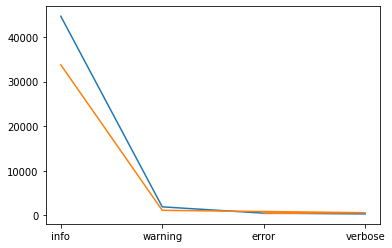

In [34]:
plt.plot(hostdhp02_df.Tag.value_counts())
plt.plot(hostdhpprime_df.Tag.value_counts())

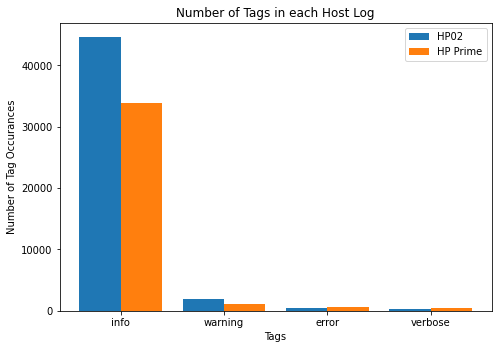

In [36]:
X = hostdhp02_df.Tag.unique()
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis - 0.2, hostdhp02_df.Tag.value_counts(), 0.4, label = 'HP02')
ax.bar(X_axis + 0.2, hostdhpprime_df.Tag.value_counts(), 0.4, label = 'HP Prime')
plt.xticks(X_axis, X)
plt.xlabel("Tags")
plt.ylabel("Number of Tag Occurances")
plt.title("Number of Tags in each Host Log")
plt.legend()

In [37]:
hostdhp02_df.Tag.value_counts()

info       44662
warning     1929
error        513
verbose      344
Name: Tag, dtype: int64

In [38]:
hostdhpprime_df.Tag.value_counts()

info       33776
warning     1149
verbose      617
error        439
Name: Tag, dtype: int64

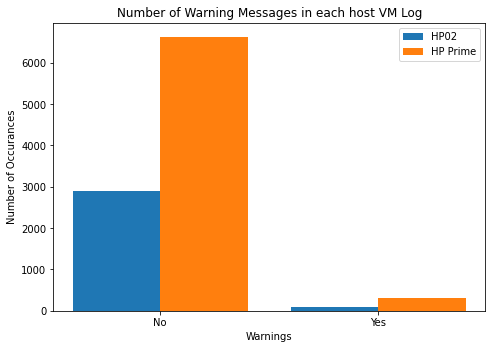

In [40]:
X = ["No", "Yes"]
X_axis = np.arange(len(X))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X_axis - 0.2, vmkhp02_df.Warning.value_counts(), 0.4, label = 'HP02')
ax.bar(X_axis + 0.2, vmkhpprime_df.Warning.value_counts(), 0.4, label = 'HP Prime')
plt.xticks(X_axis, X)
plt.xlabel("Warnings")
plt.ylabel("Number of Occurances")
plt.title("Number of Warning Messages in each host VM Log")
plt.legend()

In [41]:
vmkhp02_df.Warning.value_counts()

0    2910
1      94
Name: Warning, dtype: int64

In [42]:
vmkhpprime_df.Warning.value_counts()

0    6636
1     319
Name: Warning, dtype: int64

In [48]:
vmerrorhp02 = vmkhp02_df.loc[vmkhp02_df['Warning'] == 1, ['Message']]
vmerrorhp02.Message.unique()

array(['Device naa.6e843b6f1b89fdbd00b3d4cfcd8e24d2 performance has deteriorated. I/O latency increased from average value of 1382 microseconds to 33759 microseconds.',
       'Device naa.6e843b6f1b89fdbd00b3d4cfcd8e24d2 performance has deteriorated. I/O latency increased from average value of 1382 microseconds to 72515 microseconds.',
       'Device naa.6e843b6f1b89fdbd00b3d4cfcd8e24d2 performance has deteriorated. I/O latency increased from average value of 1551 microseconds to 147924 microseconds.',
       'system clock apparently no longer synchronized to upstream time servers',
       'system clock synchronized to upstream time servers',
       'Device naa.6589cfc000000119d7cab53ddd5d7b8f performance has deteriorated. I/O latency increased from average value of 2520 microseconds to 69676 microseconds.',
       'Cannot add delays on non-debug builds',
       'Attempt to setattr non sticky dir/file from tar mount',
       'vsi_traverse: Unimplemented operation on 0x4558c57f7948/SOCK

In [49]:
vmerrorhp02.Message.value_counts()

Cannot add delays on non-debug builds                                                                                                                              36
Attempt to setattr non sticky dir/file from tar mount                                                                                                              24
MemTierSummary is not initialized                                                                                                                                   4
[nsx@6876 comp="nsx-esx" subcomp="vswitch"]No vlan data for non dvs ports or ports without port group 0x4000010                                                     2
[nsx@6876 comp="nsx-esx" subcomp="vswitch"]No vlan data for non dvs ports or ports without port group 0x800000a                                                     2
[nsx@6876 comp="nsx-esx" subcomp="vswitch"]No vlan data for non dvs ports or ports without port group 0x800000e                                                     2
[nsx

In [50]:
vmerrorhpprime = vmkhpprime_df.loc[vmkhpprime_df['Warning'] == 1, ['Message']]
vmerrorhpprime.Message.unique()

array(['NFS volume DS_Saturn_NFS average I/O latency 78416(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 79534(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 70259(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 70937(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 73764(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 68418(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 72580(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 74731(us) has exceeded threshold 10000(us) for last 10 minutes',
       'NFS volume DS_Saturn_NFS average I/O latency 727

In [51]:
vmerrorhpprime.Message.value_counts() #https://kb.vmware.com/s/article/2007236

Cannot add delays on non-debug builds                                                                                                                              88
Attempt to setattr non sticky dir/file from tar mount                                                                                                              26
MemTierSummary is not initialized                                                                                                                                   8
[nsx@6876 comp="nsx-esx" subcomp="vswitch"]No vlan data for non dvs ports or ports without port group 0x86000008                                                    4
vsi_traverse: Unimplemented operation on 0x4558c57f5308/SOCKET_VMCI                                                                                                 4
                                                                                                                                                                   ..
Devi